# Importing necessary libraries

In [1]:
# Working directory
import os

# Processing data
import pandas as pd
import numpy as np
import datetime

# Linear regression model
import statsmodels.api as sm

# t test
from scipy.stats import t

# Plotting
import matplotlib.pyplot as plt

# 1. Event definition

#### We are conducting an analysis to assess the impact of a significant event on stock market returns.  The event of interest is the election of Donald J. Trump as the 47th President of the United States of America on November 6, 2024. We choose a 11-day event window, comprising 5 trading days before the event day, the event day, and 5 trading days after the event day.


In [2]:
# Defining the event window 
event_date = '2001-07-10'
event_start = -5
event_end = 5

# 2. Selection criteria

#### Our study specifically focuses on Tesla, Inc., a company of particular interest due to its CEO, Elon Musk, who has publicly expressed his support for Donald Trump. 

In [3]:
# Defining the stock
security_ticker = 'DDT'

# 3. Normal and abnormal returns

#### We use the market model to estimate normal returns, using the S&P 500 index as the market portfolio.

In [4]:
# Defining the market portfolio
market_ticker = 'FTSE'

# 4. Estimation procedure

#### We choose a 120-trading-days estimation window ending 10 days prior to the event window.

In [5]:
# Defining the estimation window
estimation_end = event_start - 5 - 1
estimation_start = estimation_end - (310 - 1)

### Importing data

In [6]:
# Setting the working directory
# os.chdir('C:/Users/fulia/OneDrive/xjtlu/ECO301/Code/event_study')

In [7]:
# Importing historical data: securities
data_securities = pd.read_excel("stock_price_securities100_converted.xlsx", skiprows=[1, 2])
data_securities.tail()

,TradingDate,Symbol,StatusID,Filling,SecurityID,ClosePrice
752,2002-12-23,DDT,0,0,NaN,27.50
753,2002-12-24,DDT,0,0,NaN,26.75
754,2002-12-27,DDT,0,0,NaN,27.25
755,2002-12-30,DDT,0,0,NaN,29.00
756,2002-12-31,DDT,0,0,NaN,29.00


In [8]:
data_securities.rename(columns={'TradingDate': 'trading_date', 'Symbol': 'security_ticker', 'ClosePrice': 'price'}, 
                       inplace=True)
data_securities = data_securities[['trading_date', 'security_ticker', 'price']]
data_securities = data_securities[data_securities['security_ticker']==security_ticker]
data_securities.head()

,trading_date,security_ticker,price
0,2000-01-04,DDT,NaN
1,2000-01-05,DDT,NaN
2,2000-01-06,DDT,NaN
3,2000-01-07,DDT,NaN
4,2000-01-10,DDT,NaN


In [9]:
## Calculating daily returns 
data_securities['return'] =  data_securities['price'].pct_change()
data_securities = data_securities[['trading_date', 'return']]
data_securities.head()

,trading_date,return
0,2000-01-04,NaN
1,2000-01-05,NaN
2,2000-01-06,NaN
3,2000-01-07,NaN
4,2000-01-10,NaN


In [10]:
# Importing historical data: market portfolio
data_market = pd.read_excel("stock_price_market100_converted.xlsx", skiprows=[1, 2])
data_market.head()

,Indexcd,Trddt,ExhcdOrIndexcd,IndexName,Clsidx
0,FTSE,2000-01-04,SPI,FTSE100,6665.9
1,FTSE,2000-01-05,SPI,FTSE100,6535.9
2,FTSE,2000-01-06,SPI,FTSE100,6447.2
3,FTSE,2000-01-07,SPI,FTSE100,6504.8
4,FTSE,2000-01-10,SPI,FTSE100,6607.7


In [11]:
data_market.rename(columns={'Indexcd': 'market_ticker', 'Trddt': 'trading_date', 'Clsidx': 'price'}, 
                   inplace=True)
data_market = data_market[['trading_date', 'market_ticker', 'price']]
data_market = data_market[data_market['market_ticker']==market_ticker]
data_market.head()

,trading_date,market_ticker,price
0,2000-01-04,FTSE,6665.9
1,2000-01-05,FTSE,6535.9
2,2000-01-06,FTSE,6447.2
3,2000-01-07,FTSE,6504.8
4,2000-01-10,FTSE,6607.7


In [12]:
## Calculating daily returns 
data_market['market_return'] =  data_market['price'].pct_change()
data_market = data_market[['trading_date', 'market_return']]
data_market.head()

,trading_date,market_return
0,2000-01-04,NaN
1,2000-01-05,-0.019502
2,2000-01-06,-0.013571
3,2000-01-07,0.008934
4,2000-01-10,0.015819


In [13]:
# Merging data sets
data_all = pd.merge(data_securities, data_market, on='trading_date', how='left')
data_all.head()
# data_all.rename(columns={'return': 'DDT_return'}, inplace=True)
# data_all.head()

,trading_date,return,market_return
0,2000-01-04,NaN,NaN
1,2000-01-05,NaN,-0.019502
2,2000-01-06,NaN,-0.013571
3,2000-01-07,NaN,0.008934
4,2000-01-10,NaN,0.015819


In [14]:
data_other_securities = pd.read_excel("stock_price_securities_other_five.xlsx", skiprows=[1])
data_other_securities.rename(columns={'Date': 'trading_date'}, inplace=True)
data_other_securities['trading_date'] = data_other_securities['trading_date'].dt.strftime('%Y-%m-%d')
data_other_securities['British Airways'] = data_other_securities['British Airways'].pct_change()
data_other_securities['Canary Wharf'] = data_other_securities['Canary Wharf'].pct_change()
data_other_securities['Dimension Data'] = data_other_securities['Dimension Data'].pct_change()
data_other_securities['Dixons'] = data_other_securities['Dixons'].pct_change()
data_other_securities['Scottish and Newcastle'] = data_other_securities['Scottish and Newcastle'].pct_change()
data_other_securities['United Utilities'] = data_other_securities['United Utilities'].pct_change()
data_other_securities.tail()
data_all = pd.merge(data_all, data_other_securities, on='trading_date', how='left')
data_all.head()


,trading_date,return,market_return,British Airways,Canary Wharf,Dimension Data,Dixons,Scottish and Newcastle,United Utilities
0,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-05,NaN,-0.019502,0.002462,-0.012937,NaN,NaN,0.004159,0.014516
2,2000-01-06,NaN,-0.013571,-0.000614,0.013106,NaN,NaN,0.059763,0.038951
3,2000-01-07,NaN,0.008934,-0.003071,0.001294,NaN,NaN,0.045226,0.017598
4,2000-01-10,NaN,0.015819,-0.035120,-0.001292,NaN,NaN,-0.064637,0.016541


In [15]:
data_all.rename(columns={'British Airways': 'BA_return', 'Canary Wharf': 'CW_return', 'Dimension Data': 'DD_return', 'Dixons': 'DX_return', 'Scottish and Newcastle': 'SC_return', 'United Utilities': 'UU_return'}, inplace=True)
data_all.head()

,trading_date,return,market_return,BA_return,CW_return,DD_return,DX_return,SC_return,UU_return
0,2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-05,NaN,-0.019502,0.002462,-0.012937,NaN,NaN,0.004159,0.014516
2,2000-01-06,NaN,-0.013571,-0.000614,0.013106,NaN,NaN,0.059763,0.038951
3,2000-01-07,NaN,0.008934,-0.003071,0.001294,NaN,NaN,0.045226,0.017598
4,2000-01-10,NaN,0.015819,-0.035120,-0.001292,NaN,NaN,-0.064637,0.016541


In [16]:
index_event_day = data_all.index[data_all['trading_date']==event_date].tolist()

In [17]:
index_event_day

[383]

In [18]:
if index_event_day:
    data_all['event_time'] = 0
    for i in range(len(data_all)):
        data_all.loc[data_all.index[i], 'event_time'] = i - index_event_day[0]
else:
    print("No trading date matches the event date.")
data_all[(data_all['event_time']>=event_start) & (data_all['event_time']<=event_end)]

,trading_date,return,market_return,BA_return,CW_return,DD_return,DX_return,SC_return,UU_return,event_time
378,2001-07-03,-0.286792,-0.013434,0.001435,-0.022936,-0.286792,-0.003030,-0.005455,-0.008397,-5
379,2001-07-04,-0.148148,-0.006986,-0.017192,-0.014085,-0.148148,-0.057751,-0.018282,-0.000770,-4
380,2001-07-05,-0.049689,-0.009088,-0.008746,-0.001429,-0.049689,-0.029032,0.009311,0.006163,-3
381,2001-07-06,-0.031046,-0.012686,0.021324,-0.029089,-0.031046,-0.023256,0.009225,-0.001531,-2
382,2001-07-09,-0.003373,-0.001880,0.036717,-0.007859,-0.003373,-0.030612,-0.017367,0.004601,-1
383,2001-07-10,0.018613,-0.000183,-0.005556,-0.000990,0.018613,-0.059650,-0.023256,-0.009160,0
384,2001-07-11,-0.063123,-0.013899,-0.037011,0.021308,-0.063123,-0.052238,0.011429,0.004622,1
385,2001-07-12,0.070922,0.016636,0.007977,-0.004367,0.070922,0.047244,0.007533,0.000000,2
386,2001-07-13,-0.006623,0.010107,0.000000,0.013645,-0.006623,-0.007519,-0.017757,0.011503,3
387,2001-07-16,-0.003333,-0.003594,0.007194,-0.005769,-0.003333,-0.003788,0.002854,-0.011372,4


### Estimating the market model

In [19]:
data_all_estimation = data_all[(data_all['event_time']>=estimation_start) & (data_all['event_time']<=estimation_end)]
data_all_estimation.tail()

,trading_date,return,market_return,BA_return,CW_return,DD_return,DX_return,SC_return,UU_return,event_time
368,2001-06-19,0.047872,0.001552,0.013636,0.002257,0.047872,0.017064,0.015697,-0.001580,-15
369,2001-06-20,-0.035533,0.003380,-0.014948,-0.014414,-0.035533,0.000000,0.029091,0.028481,-14
370,2001-06-21,0.017544,-0.010211,-0.019727,-0.012797,0.017544,0.006712,-0.012367,-0.026154,-13
371,2001-06-22,0.010345,0.004307,-0.006192,0.004630,0.010345,0.013333,-0.007156,0.015008,-12
372,2001-06-25,0.006826,-0.000671,-0.003115,0.002765,0.006826,0.016448,0.014414,0.018677,-11


In [20]:
print(len(data_all_estimation))
data_all_estimation.dropna(inplace=True)
print(len(data_all_estimation))

310
234


/var/folders/1s/plws044x63xc53g7y6vyflzh0000gn/T/ipykernel_39322/1162392699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all_estimation.dropna(inplace=True)


In [21]:
X_estimation = data_all_estimation['market_return']
X_estimation = sm.add_constant(X_estimation)
R_estimation = data_all_estimation['return']
market_model = sm.OLS(R_estimation, X_estimation).fit()
print(market_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.68e-25
Time:                        21:38:45   Log-Likelihood:                 492.11
No. Observations:                 234   AIC:                            -980.2
Df Residuals:                     232   BIC:                            -973.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0011      0.002     -0.556

In [22]:
R1_estimation = data_all_estimation['BA_return']
market_model1 = sm.OLS(R1_estimation, X_estimation).fit()
print(market_model1.summary())

                            OLS Regression Results                            
Dep. Variable:              BA_return   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     11.63
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000766
Time:                        21:38:45   Log-Likelihood:                 528.79
No. Observations:                 234   AIC:                            -1054.
Df Residuals:                     232   BIC:                            -1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.002     -0.073

In [23]:
R2_estimation = data_all_estimation['CW_return']
market_model2 = sm.OLS(R2_estimation, X_estimation).fit()
print(market_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              CW_return   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     14.88
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000148
Time:                        21:38:45   Log-Likelihood:                 610.84
No. Observations:                 234   AIC:                            -1218.
Df Residuals:                     232   BIC:                            -1211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0014      0.001      1.196

In [24]:
R3_estimation = data_all_estimation['DD_return']
market_model3 = sm.OLS(R3_estimation, X_estimation).fit()
print(market_model3.summary())

                            OLS Regression Results                            
Dep. Variable:              DD_return   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     34.04
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.80e-08
Time:                        21:38:45   Log-Likelihood:                 369.69
No. Observations:                 234   AIC:                            -735.4
Df Residuals:                     232   BIC:                            -728.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0006      0.003     -0.183

In [25]:
R4_estimation = data_all_estimation['DX_return']
market_model4 = sm.OLS(R4_estimation, X_estimation).fit()
print(market_model4.summary())

                            OLS Regression Results                            
Dep. Variable:              DX_return   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     25.69
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           8.18e-07
Time:                        21:38:45   Log-Likelihood:                 499.89
No. Observations:                 234   AIC:                            -995.8
Df Residuals:                     232   BIC:                            -988.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0003      0.002     -0.180

In [26]:
R5_estimation = data_all_estimation['SC_return']
market_model5 = sm.OLS(R5_estimation, X_estimation).fit()
print(market_model5.summary())

                            OLS Regression Results                            
Dep. Variable:              SC_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.002242
Date:                Thu, 05 Dec 2024   Prob (F-statistic):              0.962
Time:                        21:38:45   Log-Likelihood:                 595.23
No. Observations:                 234   AIC:                            -1186.
Df Residuals:                     232   BIC:                            -1180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0006      0.001      0.451

In [27]:
R6_estimation = data_all_estimation['UU_return']
market_model6 = sm.OLS(R6_estimation, X_estimation).fit()
print(market_model6.summary())

                            OLS Regression Results                            
Dep. Variable:              UU_return   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     4.295
Date:                Thu, 05 Dec 2024   Prob (F-statistic):             0.0393
Time:                        21:38:45   Log-Likelihood:                 619.49
No. Observations:                 234   AIC:                            -1235.
Df Residuals:                     232   BIC:                            -1228.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.001      0.138

# 5. Testing procedure

### Calculating abnormal returns

In [28]:
data_all_event = data_all[(data_all['event_time']>=event_start) & (data_all['event_time']<=event_end)]
data_all_event = data_all_event.reset_index()
data_all_event

,index,trading_date,return,market_return,BA_return,CW_return,DD_return,DX_return,SC_return,UU_return,event_time
0,378,2001-07-03,-0.286792,-0.013434,0.001435,-0.022936,-0.286792,-0.003030,-0.005455,-0.008397,-5
1,379,2001-07-04,-0.148148,-0.006986,-0.017192,-0.014085,-0.148148,-0.057751,-0.018282,-0.000770,-4
2,380,2001-07-05,-0.049689,-0.009088,-0.008746,-0.001429,-0.049689,-0.029032,0.009311,0.006163,-3
3,381,2001-07-06,-0.031046,-0.012686,0.021324,-0.029089,-0.031046,-0.023256,0.009225,-0.001531,-2
4,382,2001-07-09,-0.003373,-0.001880,0.036717,-0.007859,-0.003373,-0.030612,-0.017367,0.004601,-1
5,383,2001-07-10,0.018613,-0.000183,-0.005556,-0.000990,0.018613,-0.059650,-0.023256,-0.009160,0
6,384,2001-07-11,-0.063123,-0.013899,-0.037011,0.021308,-0.063123,-0.052238,0.011429,0.004622,1
7,385,2001-07-12,0.070922,0.016636,0.007977,-0.004367,0.070922,0.047244,0.007533,0.000000,2
8,386,2001-07-13,-0.006623,0.010107,0.000000,0.013645,-0.006623,-0.007519,-0.017757,0.011503,3
9,387,2001-07-16,-0.003333,-0.003594,0.007194,-0.005769,-0.003333,-0.003788,0.002854,-0.011372,4


In [29]:
## Calculating normal returns 
X_event = data_all_event['market_return']
X_event = sm.add_constant(X_event)
data_all_event['normal_return'] = market_model.predict(X_event)

In [30]:
# Calculateing abnormal returns as the difference between actual returns and normal returns
data_all_event['abnormal_return'] = data_all_event['return'] - data_all_event['normal_return']
data_all_event['abnormal_return_BA'] = data_all_event['BA_return'] - data_all_event['normal_return']
data_all_event['abnormal_return_CW'] = data_all_event['CW_return'] - data_all_event['normal_return']
data_all_event['abnormal_return_DD'] = data_all_event['DD_return'] - data_all_event['normal_return']
data_all_event['abnormal_return_DX'] = data_all_event['DX_return'] - data_all_event['normal_return']
data_all_event['abnormal_return_SC'] = data_all_event['SC_return'] - data_all_event['normal_return']
data_all_event['abnormal_return_UU'] = data_all_event['UU_return'] - data_all_event['normal_return']

### Calculating average abnormal returns

In [31]:
# Get average abnormal returns
data_all_event['cumulative_abnormal_return'] = data_all_event[['abnormal_return', 'abnormal_return_BA', 'abnormal_return_CW', 'abnormal_return_DD', 'abnormal_return_DX', 'abnormal_return_SC', 'abnormal_return_UU']].mean(axis=1)

In [32]:
data_all_event.head()

,index,trading_date,return,market_return,BA_return,CW_return,DD_return,DX_return,SC_return,UU_return,event_time,normal_return,abnormal_return,abnormal_return_BA,abnormal_return_CW,abnormal_return_DD,abnormal_return_DX,abnormal_return_SC,abnormal_return_UU,cumulative_abnormal_return
0,378,2001-07-03,-0.286792,-0.013434,0.001435,-0.022936,-0.286792,-0.003030,-0.005455,-0.008397,-5,-0.028516,-0.258277,0.029951,0.005580,-0.258277,0.025486,0.023061,0.020119,-0.058908
1,379,2001-07-04,-0.148148,-0.006986,-0.017192,-0.014085,-0.148148,-0.057751,-0.018282,-0.000770,-4,-0.015346,-0.132802,-0.001846,0.001262,-0.132802,-0.042405,-0.002935,0.014577,-0.042421
2,380,2001-07-05,-0.049689,-0.009088,-0.008746,-0.001429,-0.049689,-0.029032,0.009311,0.006163,-3,-0.019640,-0.030049,0.010894,0.018212,-0.030049,-0.009392,0.028951,0.025804,0.002053
3,381,2001-07-06,-0.031046,-0.012686,0.021324,-0.029089,-0.031046,-0.023256,0.009225,-0.001531,-2,-0.026987,-0.004059,0.048310,-0.002102,-0.004059,0.003731,0.036212,0.025455,0.014784
4,382,2001-07-09,-0.003373,-0.001880,0.036717,-0.007859,-0.003373,-0.030612,-0.017367,0.004601,-1,-0.004918,0.001546,0.041635,-0.002940,0.001546,-0.025694,-0.012449,0.009520,0.001880


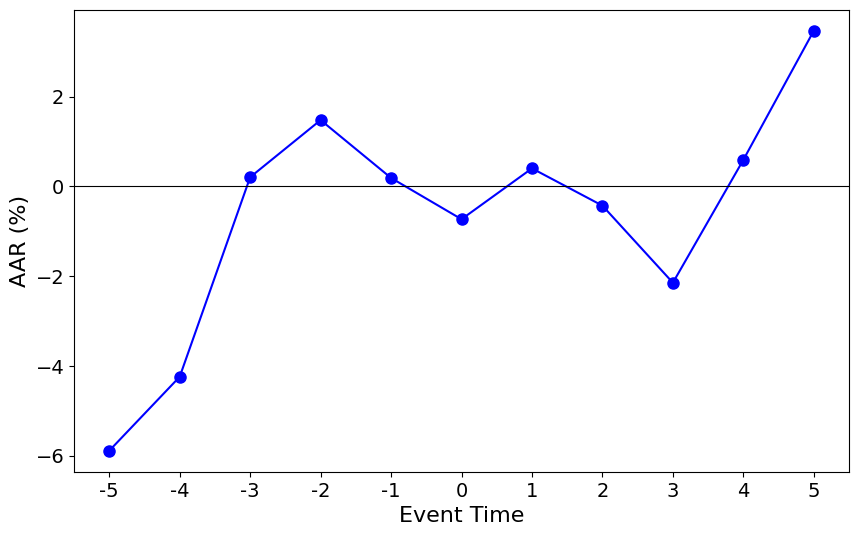

In [33]:
# Plotting the cumulative abnormal returns
plt.figure(figsize=(10, 6)) 
plt.plot(data_all_event['event_time'], 100*data_all_event['cumulative_abnormal_return'], 
         marker='o', linestyle='-', color='b', markersize=8) 
plt.axhline(0, color='black', linewidth=0.8)

## Customizing the plot
plt.xlabel('Event Time', fontsize=16)
plt.ylabel('AAR (%)', fontsize=16)
ticks = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plt.xticks(ticks, ticks)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Showing the plot
plt.show()

### Significane of ARs and AARs

In [34]:
# Calculating the sample standard errors of ARs
## Equations (4.4) and (4.5)
L1 = data_all_estimation.shape[0]
e_hat_estimation = market_model.resid
sigma2_hat = np.sum(np.square(e_hat_estimation)) / (L1 - 2)
np.sqrt(sigma2_hat)

np.float64(0.02966852719172759)

In [35]:
## Equation (5.3)
L2 = data_all_event.shape[0]
V_hat = sigma2_hat*np.eye(L2) + sigma2_hat*X_event@np.linalg.inv(X_estimation.T@X_estimation)@X_event.T.values
V_hat

,0,1,2,3,4,5,6,7,8,9,10
0,8.889843e-04,6.268238e-06,7.081593e-06,8.473123e-06,0.000004,0.000004,8.942638e-06,-2.869817e-06,-3.439020e-07,0.000005,0.000010
1,6.268238e-06,8.852395e-04,5.425622e-06,6.123068e-06,0.000004,0.000004,6.358393e-06,4.378963e-07,1.703905e-06,0.000004,0.000007
2,7.081593e-06,5.425622e-06,8.861871e-04,6.889318e-06,0.000004,0.000004,7.201002e-06,-6.406037e-07,1.036205e-06,0.000005,0.000008
3,8.473123e-06,6.123068e-06,6.889318e-06,8.884218e-04,0.000004,0.000004,8.642580e-06,-2.485757e-06,-1.061302e-07,0.000005,0.000009
4,4.292967e-06,4.027941e-06,4.114354e-06,4.262195e-06,0.000884,0.000004,4.312078e-06,3.057083e-06,3.325445e-06,0.000004,0.000004
5,3.636497e-06,3.698913e-06,3.678562e-06,3.643745e-06,0.000004,0.000884,3.631997e-06,3.927555e-06,3.864355e-06,0.000004,0.000004
6,8.942638e-06,6.358393e-06,7.201002e-06,8.642580e-06,0.000004,0.000004,8.893505e-04,-3.108329e-06,-4.915650e-07,0.000005,0.000010
7,-2.869817e-06,4.378963e-07,-6.406037e-07,-2.485757e-06,0.000003,0.000004,-3.108329e-06,8.927764e-04,9.205521e-06,0.000002,-0.000004
8,-3.439020e-07,1.703905e-06,1.036205e-06,-1.061302e-07,0.000003,0.000004,-4.915650e-07,9.205521e-06,8.873535e-04,0.000003,-0.000001
9,4.956085e-06,4.360300e-06,4.554559e-06,4.886908e-06,0.000004,0.000004,4.999045e-06,2.177797e-06,2.781078e-06,0.000884,0.000005


In [36]:
## Sample standard errors of ARs
data_all_event['s.e._abnormal_return'] = np.sqrt(np.diag(V_hat))

In [37]:
# Calculating the sample standard errors of CARs
data_all_event['s.e._cumulative_abnormal_return'] = np.sqrt(np.cumsum(np.diag(V_hat)))

In [38]:
# t statistics and p values: Testing the significance of CARs
data_all_event['t_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] / data_all_event['s.e._cumulative_abnormal_return']
data_all_event['p_cumulative_abnormal_return'] = 2*t.sf(np.abs(data_all_event['t_cumulative_abnormal_return']), L1 - 2)

In [39]:
# Confidence intervals: CARs
data_all_event['upper_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] + t.ppf(1 - 0.1/2, L1 - 2)*data_all_event['s.e._cumulative_abnormal_return']
data_all_event['lower_cumulative_abnormal_return'] = data_all_event['cumulative_abnormal_return'] - t.ppf(1 - 0.1/2, L1 - 2)*data_all_event['s.e._cumulative_abnormal_return']

In [40]:
data_all_event.rename(columns={'abnormal_return': 'AR',
                               'cumulative_abnormal_return': 'CAR',
                               's.e._abnormal_return': 's.e._AR',
                               's.e._cumulative_abnormal_return': 's.e._CAR',
                               't_cumulative_abnormal_return': 't_CAR',
                               'p_cumulative_abnormal_return': 'p_CAR',
                               'upper_cumulative_abnormal_return': 'upper_CAR',
                               'lower_cumulative_abnormal_return': 'lower_CAR'}, inplace=True)
data_all_event[['event_time', 'AR', 's.e._AR', 'CAR', 's.e._CAR', 't_CAR', 'p_CAR', 'upper_CAR', 'lower_CAR']]

,event_time,AR,s.e._AR,CAR,s.e._CAR,t_CAR,p_CAR,upper_CAR,lower_CAR
0,-5,-0.258277,0.029816,-0.058908,0.029816,-1.975733,0.049370,-0.009669,-0.108147
1,-4,-0.132802,0.029753,-0.042421,0.042122,-1.007121,0.314926,0.027140,-0.111983
2,-3,-0.030049,0.029769,0.002053,0.051579,0.039803,0.968285,0.087233,-0.083127
3,-2,-0.004059,0.029806,0.014784,0.059572,0.248170,0.804222,0.113164,-0.083596
4,-1,0.001546,0.029733,0.001880,0.066580,0.028244,0.977492,0.111834,-0.108073
5,0,0.020065,0.029732,-0.007317,0.072917,-0.100344,0.920158,0.113102,-0.127735
6,1,-0.033658,0.029822,0.004017,0.078779,0.050995,0.959373,0.134118,-0.126083
7,2,0.038026,0.029879,-0.004292,0.084255,-0.050936,0.959420,0.134852,-0.143435
8,3,-0.026184,0.029788,-0.021471,0.089366,-0.240263,0.810339,0.126112,-0.169055
9,4,0.005086,0.029737,0.005912,0.094184,0.062776,0.949999,0.161452,-0.149627


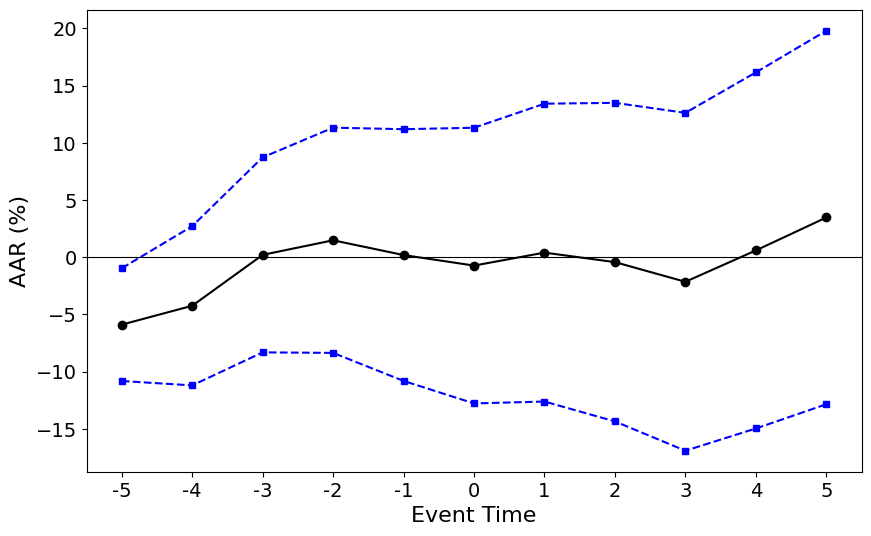

In [41]:
# Plotting the cumulative abnormal returns
plt.figure(figsize=(10, 6)) 
plt.plot(data_all_event['event_time'], 100*data_all_event['CAR'], 
         marker='o', linestyle='-', color='black', markersize=6) 
plt.plot(data_all_event['event_time'], 100*data_all_event['upper_CAR'], 
         marker='s', linestyle='--', color='blue', markersize=4) 
plt.plot(data_all_event['event_time'], 100*data_all_event['lower_CAR'], 
         marker='s', linestyle='--', color='blue', markersize=4) 
plt.axhline(0, color='black', linewidth=0.8)

## Customizing the plot
plt.xlabel('Event Time', fontsize=16)
plt.ylabel('AAR (%)', fontsize=16)
ticks = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
plt.xticks(ticks, ticks)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Showing the plot
plt.show()

### Replicating the results provided by the 'eventstudy' library

In [42]:
# Sample standard errors of ARs
np.sqrt(np.var(e_hat_estimation))

np.float64(0.029541466534239225)

In [43]:
# Sample standard errors of CARs
np.sqrt(np.var(e_hat_estimation)*range(1,12))

array([0.02954147, 0.04177794, 0.05116732, 0.05908293, 0.06605673,
       0.07236152, 0.07815937, 0.08355589, 0.0886244 , 0.09341832,
       0.09797796])

In [44]:
# t statistics
t_statistic = np.array(data_all_event[['CAR']].T) / np.array(np.sqrt(np.var(e_hat_estimation)*range(1,12))).T
t_statistic

array([[-1.99408275, -1.01540334,  0.0401229 ,  0.25022462,  0.02846777,
        -0.10111373,  0.05140009, -0.05136277, -0.24227431,  0.06329024,
         0.35412881]])

In [45]:
# p values
2*t.sf(np.abs(t_statistic), data_all_estimation.shape[0] - 2)

array([[0.0473137 , 0.31097136, 0.96802965, 0.80263508, 0.97731354,
        0.91954751, 0.95905094, 0.95908065, 0.80878165, 0.94958988,
        0.723564  ]])